## Análise de regressão

<br>
<br>
<br>

A regressão é provavelmente a técnica estatística mais usada em ciências sociais.  
Seu objetivo é avaliar o quanto determinadas variáveis ($x_1, x_2 ..., x_p$) permitem prever o valor de uma certa variável ($y$). As primeiras são chamadas de variáveis explicativas (ou independentes) e a variável $y$ é conhecida como variável explicada ou dependente.

O pacote que usaremos para fazer as análises é o [StatsModels](http://statsmodels.sourceforge.net/). Note que usaremos a versão `statsmodels.formula.api`, que simplifica alguns passos do processo.

<br>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np                 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import statsmodels.formula.api as smf      # aqui está o statsmodels
                                           # formula.api é a versão mais simples do pacote

Vamos começar usar os dados do Atlas Brasil, que contém informações sobre cada um dos 5.565 municípios brasileiros.

In [2]:
atlas = pd.read_csv('dados/atlas.csv')

Se quisermos usar a porcentagem de pessoas maiores de 25 anos para explicar a renda per capita do município, basta usar o nome das variáveis separados por um "~". A variável anterior ao til será a variável explicada, o $y$. 

Para ir diretamente ao resultado da regressão, use os comandos `.fit()` e `.summary()`, como mostrado abaixo.

In [5]:
smf.ols('rdpc ~ t_super25m', data=atlas).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rdpc   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     8390.
Date:                Sun, 05 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:39:44   Log-Likelihood:                -35912.
No. Observations:                5565   AIC:                         7.183e+04
Df Residuals:                    5563   BIC:                         7.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    175.4535      4.038     43.451      0.000     167.538     183.369
t_super25m    57.8890      0.632     91.597      0.000      56.650      59.128
==============================================================================
Omnibus:                     1376.610   Durbin-Watson:                   1.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4131.045
Skew:                           1.273   Prob(JB):                         0.00
Kurtosis:                       6.367   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O principal resultado da regressão é o $R^2$ (R-quadrado ou R-squared), o coeficiente de determinação, um número que varia entre 0 e 1. Quanto mais próximo de 1, maior a relação entre as duas variáveis. Nesse caso, o valor foi razoavelmente alto, 0,601.

Você pode estar se perguntando qual é a relação entre o $R^2$ e o coeficiente de correlação, que aprendemos anteriormente. Eles são medidas intimamente interligadas.

Vejamos a correlação entre essas duas mesmas variáveis.

In [37]:
atlas[['rdpc', 't_super25m']].corr()

,rdpc,t_super25m
rdpc,1.000000,0.775438
t_super25m,0.775438,1.000000


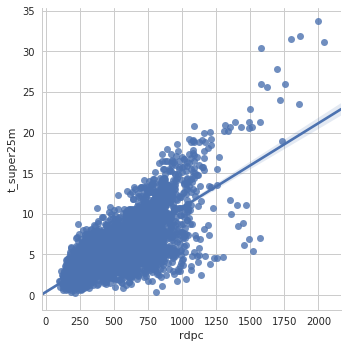

In [13]:
sns.lmplot('rdpc', 't_super25m', data=atlas);

Se elevarmos a correlação ao quadrado, chegamos aco coeficiente de determinação ($R^2$).

In [14]:
0.7754 ** 2

0.60124516

Essa intimidade entre as duas medidas é bastante importante e é bom não se esquecer dela. Porém, a correlação só pode ser calculada entre duas variáveis (ao menos em sua versão mais simples, a correlação de Pearson). 

O $R^2$, no entanto, pode ser calculado para a relação entre diversas variáveis explicativas e uma variável explicada.  
Basta usar um sinal de "+" no comando do statsmodels. Aqui, vamos acrescentar a porcentagem de trabalhadores na indústria de transformação.

In [16]:
smf.ols('rdpc ~ t_super25m + p_transf', data=atlas).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rdpc   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     5679.
Date:                Sun, 05 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:43:59   Log-Likelihood:                -35375.
No. Observations:                5565   AIC:                         7.076e+04
Df Residuals:                    5562   BIC:                         7.078e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    138.8846      3.818     36.377      0.000     131.400     146.369
t_super25m    51.2289      0.606     84.578      0.000      50.042      52.416
p_transf       7.6110      0.221     34.403      0.000       7.177       8.045
==============================================================================
Omnibus:                     1855.112   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8575.470
Skew:                           1.555   Prob(JB):                         0.00
Kurtosis:                       8.226   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A nova variável aumentou um pouco o $R^2$, o que sugere que ela tem algum poder de explicação.  
Podemos também inserir variáveis categóricas, por exemplo, o porte do município.

In [19]:
smf.ols('rdpc ~ t_super25m + p_transf + porte', data=atlas).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rdpc   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1658.
Date:                Sun, 05 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:44:59   Log-Likelihood:                -35318.
No. Observations:                5564   AIC:                         7.065e+04
Df Residuals:                    5556   BIC:                         7.071e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             94.1027     30.389      3.097      0.002      34.529     153.677
porte[T.grandeII]     74.2666     46.963      1.581      0.114     -17.799     166.332
porte[T.medioI]       -1.3653     30.225     -0.045      0.964     -60.618      57.888
porte[T.medioII]      25.4745     30.340      0.840      0.401     -34.005      84.954
porte[T.pequenoI]     48.8015     29.653      1.646      0.100      -9.330     106.933
porte[T.pequenoII]     6.9100     29.767      0.232      0.816     -51.445      65.265
t_super25m            52.4133      0.681     77.000      0.000      51.079      53.748
p_transf               7.7472      0.220     35.148      0.000       7.315       8.179
==============================================================================
Omnibus:                     1770.511   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7995.340
Skew:                           1.485   Prob(JB):                         0.00
Kurtosis:                       8.066   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O acréscimo dessa nova variável não gerou bons resultados, ele aumentou apenas alguns milésimos do $R^2$ ao custo de aumentar a complexidade do modelo. 

Veja a coluna `coef`(coeficientes) nos resumo do modelo. Essa é uma medida da relação entre os valores das variáveis explicativas e da variável explicada. Em primeiro lugar, note que no caso da variável categórica há uma linha para cada um dos valores da variável (exceto um, tomado como o padrão - no caso, porte grande I). 

Em seguida, observe a coluna $P>|t|$, o valor-p. Quanto maior esse maior, maior a chance de a relação encontrada ser fruto do acaso. Normalmente, espera-se que esse valor seja menor do que 0,05. Ele é praticamente zero no caso das variáveis sobre ensino superior e trabalhadores na indústria, o que indica que essas variáveis provavelmente estão realmente relacionadas à renda per capita. No entanto, o valor-p é maior do que 0,05 em todos os níveis de porte da população dos municípios. 

Portanto, diante do pequeno aumento no $R^2$ e a falta de significância estatística, talvez seja melhor não incluir essa variável no modelo. Dissemos "talvez" porque você pode ter algum motivo para estar interessado especificamente no porte dos municípios.

### Especificando variáveis categóricas numéricas

Quando os níveis das variáveis categóricas são palavras (*strings*), o statsmodels automaticamente as trata como categorias. Isso não acontece quando as categorias estão codificadas como números (por exemplo, sexos como 1 e 2). 

Para ver como lidar com isso, vamos usar os dados da Pnad, para analisar a relação entre rendimentos e cor da pele (codificadas como 1, 2, 3, 4 e 5). 

Compare os resultados dos dois modelos abaixo.

In [38]:
pnad = pd.read_csv('dados/pnad_amostra.csv')

In [39]:
smf.ols('rendimento ~ cor', data=pnad).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             rendimento   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     84.52
Date:                Sun, 05 Nov 2017   Prob (F-statistic):           6.05e-20
Time:                        17:30:00   Log-Likelihood:                -35897.
No. Observations:                3908   AIC:                         7.180e+04
Df Residuals:                    3906   BIC:                         7.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2343.9115     76.974     30.451      0.000    2192.999    2494.824
cor         -240.6260     26.174     -9.193      0.000    -291.943    -189.309
==============================================================================
Omnibus:                     6636.142   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11709014.048
Skew:                          11.216   Prob(JB):                         0.00
Kurtosis:                     270.217   Cond. No.                         6.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
smf.ols('rendimento ~ C(cor)', data=pnad).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             rendimento   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     25.37
Date:                Sun, 05 Nov 2017   Prob (F-statistic):           8.83e-21
Time:                        17:30:07   Log-Likelihood:                -35889.
No. Observations:                3908   AIC:                         7.179e+04
Df Residuals:                    3903   BIC:                         7.182e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2169.3495     57.956     37.431      0.000    2055.722    2282.977
C(cor)[T.2]  -813.1102    142.832     -5.693      0.000   -1093.142    -533.079
C(cor)[T.3]  -446.9209    632.608     -0.706      0.480   -1687.194     793.352
C(cor)[T.4]  -758.8516     79.226     -9.578      0.000    -914.181    -603.522
C(cor)[T.5] -1125.6495    747.614     -1.506      0.132   -2591.400     340.101
==============================================================================
Omnibus:                     6645.512   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11853099.580
Skew:                          11.246   Prob(JB):                         0.00
Kurtosis:                     271.862   Cond. No.                         22.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Veja as linhas onde aparecem os coeficientes. No primeiro modelo, há apenas um linha para cor, indicando que ela foi tratada como uma variável numérica. No segundo caso, há uma linha para cada categoria, indicando que ela realmente foi tratada como categórica.

Isso é importante porque quando a variável é tratada como numérica, o modelo supõe relações de magnitude. Por exemplo, 5 é cinco vezes maior do que 1, 2 está mais próximo de 3 do que de 5 etc. Essa suposição pode ser muito inadequada em diversas situações. 

Como no presente caso. Veja o siginificado dos códigos. 

código|cor
--|--
1| branca
2| preta
3| amarela
4| parda 
5| indígena
9| ignorado


Para resolver isso, é preciso indicar que os números represetam categorias. Isso é feito escrevendo o nome da variável dentro do comando `C()`, como no comando usando para criar o segundo modelo.

Vejamos outro exemplo. Agora tentaremos prever o rendimento usando o nível de instrução, o sexo, a cor e a unidade da federação. Todas essas são variáveis categóricas, mas apenas as duas últimas estão codificadas como números. Por isso, no caso delas é preciso usar `C()`. 

In [30]:
smf.ols('rendimento ~ nivel_instrucao + sexo + C(cor) + C(uf)', data=pnad).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             rendimento   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     28.64
Date:                Sun, 05 Nov 2017   Prob (F-statistic):          2.15e-173
Time:                        16:49:39   Log-Likelihood:                -35466.
No. Observations:                3908   AIC:                         7.101e+04
Df Residuals:                    3870   BIC:                         7.125e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1098.4759    286.718      3.831      0.000     536.343    1660.609
nivel_instrucao[T.fundamental_inc]  -150.1155    131.076     -1.145      0.252    -407.099     106.868
nivel_instrucao[T.medio]             398.5479    129.201      3.085      0.002     145.240     651.856
nivel_instrucao[T.medio_inc]         -72.1545    178.586     -0.404      0.686    -422.287     277.978
nivel_instrucao[T.sem_instrucao]    -370.7861    192.645     -1.925      0.054    -748.481       6.908
nivel_instrucao[T.superior]         2755.8185    145.403     18.953      0.000    2470.745    3040.892
nivel_instrucao[T.superior_inc]      680.0567    183.981      3.696      0.000     319.348    1040.765
sexo[T.masculino]                    702.4964     71.503      9.825      0.000     562.309     842.683
C(cor)[T.2]                         -364.0980    135.269     -2.692      0.007    -629.303     -98.893
C(cor)[T.3]                         -657.6033    572.914     -1.148      0.251   -1780.845     465.639
C(cor)[T.4]                         -233.2652     82.368     -2.832      0.005    -394.754     -71.777
C(cor)[T.5]                        -1688.2776    684.292     -2.467      0.014   -3029.885    -346.670
C(uf)[T.12]                         -218.4991    358.346     -0.610      0.542    -921.065     484.067
C(uf)[T.13]                         -229.3774    330.428     -0.694      0.488    -877.208     418.453
C(uf)[T.14]                         -282.8191    416.171     -0.680      0.497   -1098.754     533.115
C(uf)[T.15]                         -420.6778    319.094     -1.318      0.187   -1046.285     204.930
C(uf)[T.16]                         1853.5896    465.256      3.984      0.000     941.420    2765.759
C(uf)[T.17]                         -468.1386    361.964     -1.293      0.196   -1177.797     241.520
C(uf)[T.21]                         -593.4295    293.815     -2.020      0.043   -1169.476     -17.383
C(uf)[T.22]                         -488.1594    344.522     -1.417      0.157   -1163.622     187.303
C(uf)[T.23]                         -553.2176    305.552     -1.811      0.070   -1152.277      45.842
C(uf)[T.24]                         -310.2229    347.743     -0.892      0.372    -992.000     371.555
C(uf)[T.25]                         -521.4019    325.236     -1.603      0.109   -1159.052     116.248
C(uf)[T.26]                         -445.7338    329.695     -1.352      0.176   -1092.127     200.659
C(uf)[T.27]                         -609.8402    334.942     -1.821      0.069   -1266.521      46.840
C(uf)[T.28]                         -220.2530    353.579     -0.623      0.533    -913.473     472.967
C(uf)[T.29]                         -367.4547    304.697     -1.206      0.228    -964.836     2

### Regressão é média condicional

A melhor maneira de começar a entender como funciona a regressão é saber que ela calcula médias condicionais.

Isso é mais fácil de compreender no caso de uma única variável explicativa categórica.  

Por exemplo, se tentarmos prever os rendimentos apenas a partir do sexo, isso significa calcular a diferença entre a média dos rendimentos masculinos e a média dos rendimentos femininos. Observe o coeficiente do sexo.


In [31]:
smf.ols('rendimento ~ sexo', data=pnad).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             rendimento   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     15.79
Date:                Sun, 05 Nov 2017   Prob (F-statistic):           7.19e-05
Time:                        16:50:20   Log-Likelihood:                -35931.
No. Observations:                3908   AIC:                         7.187e+04
Df Residuals:                    3906   BIC:                         7.188e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1539.7717     60.654     25.386      0.000    1420.856    1658.688
sexo[T.masculino]   309.7841     77.952      3.974      0.000     156.954     462.615
==============================================================================
Omnibus:                     6545.183   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10534278.758
Skew:                          10.918   Prob(JB):                         0.00
Kurtosis:                     256.410   Cond. No.                         2.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O valor do coeficiente do sexo, 309,78, é exatamente a diferença entre a média de rendimento masculino e feminino.

In [35]:
pnad.groupby('sexo').rendimento.mean()

sexo
feminino     1539.771725
masculino    1849.555790
Name: rendimento, dtype: float64

In [36]:
pnad.groupby('sexo').rendimento.mean()[1] - pnad.groupby('sexo').rendimento.mean()[0]

309.78406533105726